# 18IM30014 : OHM Term Project

### Import required libraries and classes

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from GA_Class import GA
from GeneSA_Class import Gene_SA
from SA_Class import SA

### Load dataset and initialize parameters

In [32]:
df = pd.read_excel (r'/Users/nesarasr/Documents/Sem6/OHM Lab/OHM Term Project/BankDataset.xlsx')

In [33]:
df

,Customer No,Interest,Rating,Loss (lambda),Loan Size
0,1,0.021,AAA,0.0002,10
1,2,0.022,BB,0.0058,25
2,3,0.021,A,0.0001,4
3,4,0.027,AA,0.0003,11
4,5,0.025,BBB,0.0024,18
5,6,0.026,AAA,0.0002,3
6,7,0.023,BB,0.0058,17
7,8,0.021,AAA,0.0002,15
8,9,0.028,A,0.0010,9
9,10,0.022,A,0.0010,10


In [34]:
D = 60
K = 0.15
N = 10
PIC = 0.0025
population_size = 60
generations = 60
crossover_probability = 0.8
mutation_probability = 0.006
rT=0.01
rD=0.009

### Implement Genetic Algorithm

In [35]:
GA1 = GA(df,D,K,N,PIC,rT,rD,population_size,generations,crossover_probability,mutation_probability)
iter_best_fitness_GA,global_best_fitness_GA,iter_avg_fitness_GA = GA1.run_GA()

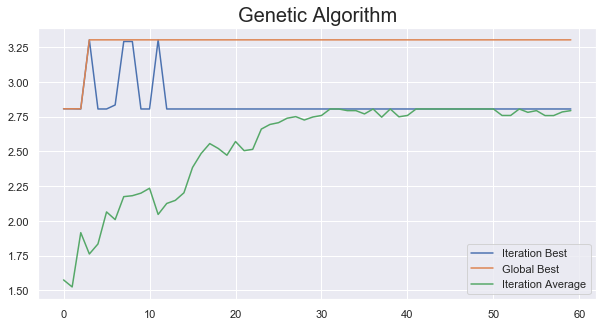

In [36]:
plt.plot(iter_best_fitness_GA,label='Iteration Best')
plt.plot(global_best_fitness_GA,label='Global Best')
plt.plot(iter_avg_fitness_GA,label='Iteration Average')
title= 'Genetic Algorithm'
plt.title(title,fontsize=20)
plt.legend(loc='best') 
fig_size=(10,5)
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [37]:
print("The best fitness obtained ",GA1.best_fitness)
print("The best portfolio obtained ",GA1.best_chromosome)

The best fitness obtained  3.3028999999999997
The best portfolio obtained  [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]


### Implement Simulated Annealing Algorithm

In [38]:
SA1 = SA(df,D,K,N,PIC,rT,rD)
iter_best_fitness_SA,global_best_fitness_SA = SA1.run_SA()

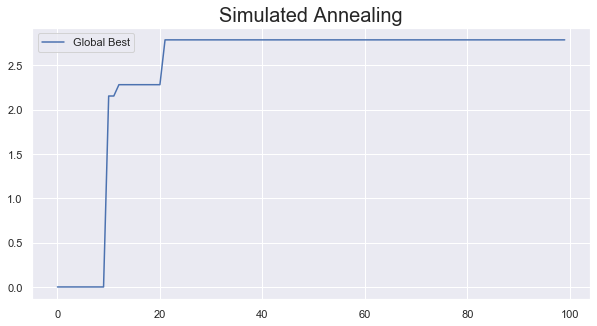

In [39]:
plt.plot(global_best_fitness_SA[:100],label='Global Best')
title= 'Simulated Annealing'
plt.title(title,fontsize=20)
plt.legend(loc='best') 
fig_size=(10,5)
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [40]:
print("The best fitness obtained ",SA1.best_fitness)
print("The best portfolio obtained ",SA1.best_chromosome)

The best fitness obtained  2.9062999999999994
The best portfolio obtained  [0, 1, 0, 0, 0, 1, 0, 0, 1, 0]


### Implement Genetic Simulated Annealing Algorithm

In [41]:
GSA1 = Gene_SA(df,D,K,N,PIC,rT,rD,population_size,generations,crossover_probability,mutation_probability)
iter_best_fitness_GSA,global_best_fitness_GSA,iter_avg_fitness_GSA = GSA1.run_GeneSA()

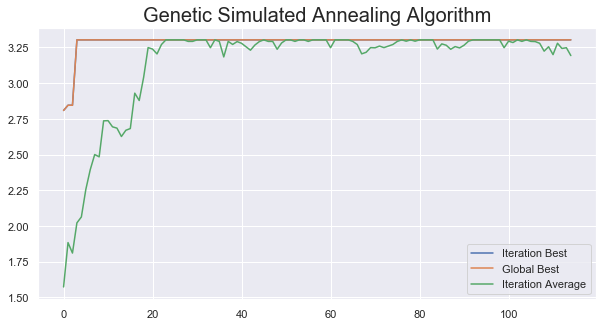

In [42]:
plt.plot(iter_best_fitness_GSA,label='Iteration Best')
plt.plot(global_best_fitness_GSA,label='Global Best')
plt.plot(iter_avg_fitness_GSA,label='Iteration Average')
title= 'Genetic Simulated Annealing Algorithm'
plt.title(title,fontsize=20)
plt.legend(loc='best') 
fig_size=(10,5)
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [43]:
print("The best fitness obtained ",GSA1.best_fitness)
print("The best portfolio obtained ",GSA1.best_chromosome)

The best fitness obtained  3.3028999999999997
The best portfolio obtained  [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]


### Compare Convergence

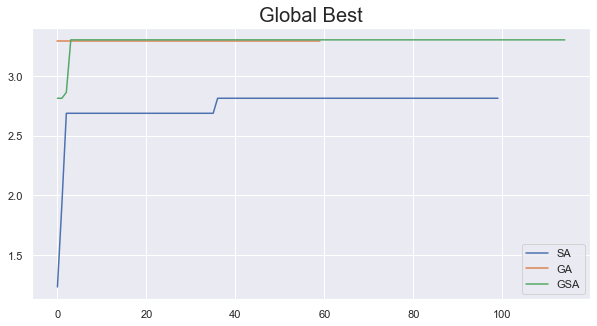

In [50]:
plt.plot(global_best_fitness_SA[:100],label='SA')
plt.plot(global_best_fitness_GA,label='GA')
plt.plot(global_best_fitness_GSA,label='GSA')
title= 'Global Best'
plt.title(title,fontsize=20)
plt.legend(loc='best') 
fig_size=(10,5)
plt.rcParams["figure.figsize"] = fig_size
plt.show()

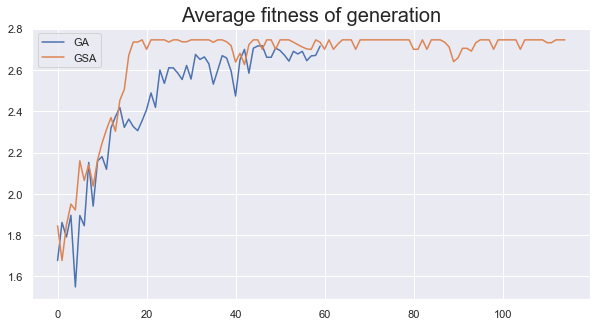

In [52]:
plt.plot(iter_avg_fitness_GA,label='GA')
plt.plot(iter_avg_fitness_GSA,label='GSA')
title= 'Average fitness of generation'
plt.title(title,fontsize=20)
plt.legend(loc='best') 
fig_size=(10,5)
plt.rcParams["figure.figsize"] = fig_size
plt.show()

### Which algorithm has the highest probability of hitting the optimal?

In [46]:
# run each algo 100 times and plot distplot of the distribution of best fitness

best_fitness_distribution_GA = []
for i in range(100):

    if (i+1)%10==0:
        print("Running GA for the ",i+1,"th time")
    GA_iter = GA(df,D,K,N,PIC,rT,rD,population_size,generations,crossover_probability,mutation_probability)
    iter_best_fitness_GA,global_best_fitness_GA,iter_avg_fitness_GA = GA_iter.run_GA()
    best_fitness_distribution_GA.append(GA_iter.best_fitness)


best_fitness_distribution_SA = []
for i in range(100):

    if (i+1)%10==0:
        print("Running SA for the ",i+1,"th time")
    SA_iter = SA(df,D,K,N,PIC,rT,rD)
    iter_best_fitness_SA,global_best_fitness_SA = SA_iter.run_SA()
    best_fitness_distribution_SA.append(SA_iter.best_fitness)




best_fitness_distribution_GSA = []
for i in range(100):

    if (i+1)%10==0:
        print("Running GeneSA for the ",i+1,"th time")
    GSA_iter = Gene_SA(df,D,K,N,PIC,rT,rD,population_size,generations,crossover_probability,mutation_probability)
    iter_best_fitness_GSA,global_best_fitness_GSA,iter_avg_fitness_GSA = GSA_iter.run_GeneSA()
    best_fitness_distribution_GSA.append(GSA_iter.best_fitness)





Running GA for the  10 th time
Running GA for the  20 th time
Running GA for the  30 th time
Running GA for the  40 th time
Running GA for the  50 th time
Running GA for the  60 th time
Running GA for the  70 th time
Running GA for the  80 th time
Running GA for the  90 th time
Running GA for the  100 th time
Running SA for the  10 th time
Running SA for the  20 th time
Running SA for the  30 th time
Running SA for the  40 th time
Running SA for the  50 th time
Running SA for the  60 th time
Running SA for the  70 th time
Running SA for the  80 th time
Running SA for the  90 th time
Running SA for the  100 th time
Running GeneSA for the  10 th time
Running GeneSA for the  20 th time
Running GeneSA for the  30 th time
Running GeneSA for the  40 th time
Running GeneSA for the  50 th time
Running GeneSA for the  60 th time
Running GeneSA for the  70 th time
Running GeneSA for the  80 th time
Running GeneSA for the  90 th time
Running GeneSA for the  100 th time


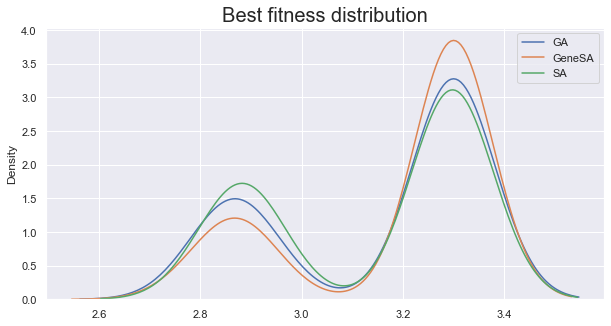

In [49]:
sns.distplot(best_fitness_distribution_GA,bins=3,label="GA",hist=False)
sns.distplot(best_fitness_distribution_GSA,bins=3,label="GeneSA",hist=False)
sns.distplot(best_fitness_distribution_SA,bins=3,label="SA",hist=False)
title= 'Best fitness distribution'
plt.title(title,fontsize=20)
plt.legend(loc='best') 
fig_size=(10,5)
plt.rcParams["figure.figsize"] = fig_size
plt.show()